In [28]:
# Carregando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
# Registro converters para uso no matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [29]:
# Carregando dados
base = pd.read_csv('dados\AirPassengers.csv')
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [30]:
# Descritivo dos dados
base.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [31]:
# Visualizando o tipo de dados
base.dtypes

Month          object
#Passengers     int64
dtype: object

In [32]:
# Convertendo a coluna 'Month' para datetime
base['Month'] = pd.to_datetime(base['Month'], format='%Y-%m')
base = base.set_index('Month')
base.dtypes


#Passengers    int64
dtype: object

In [33]:
# Criando série temporal
ts = base['#Passengers']

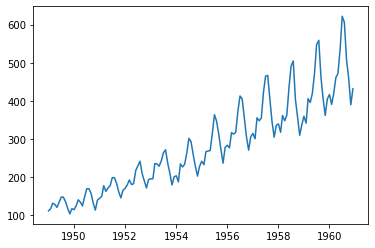

In [9]:
# Visualizando a série temporal
plt.plot(ts)

In [13]:
# decomposição da série temporal
decomposicao = seasonal_decompose(ts)

In [16]:
# Extranido a tendência
tendencia = decomposicao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [17]:
# Extrando a sazonalidade
sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [18]:
# Extrando os resíduos
residuos = decomposicao.resid
residuos

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

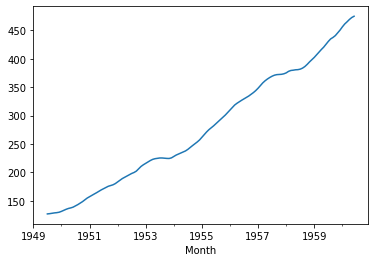

In [19]:
# Visualizando a tendência
plt = tendencia.plot()

Na tendencia podemos notar a linearidade, com uma tendência quase perfeita de crescimento, se obervamos os dados originais nota-la, porem apos a decomposição podemos ver com mais clareza.

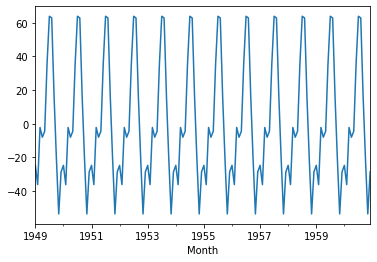

In [20]:
# Visualizando a sazonalidade
plt = sazonal.plot()

Visualizando a sazonalidade podemos notar a regularidade dos dados


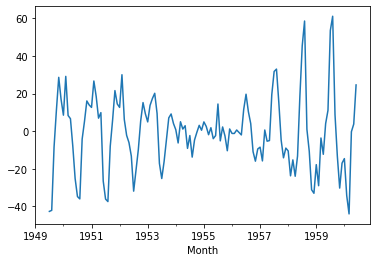

In [21]:
# Visualizando os resíduos
plt = residuos.plot()

Extrando os residuos, ou seja os dados que não fizeram parte nem da tendencia nem da sazonalida, os dados que não podemos explicar matematicamente. São ruidos que estavam na série temporal

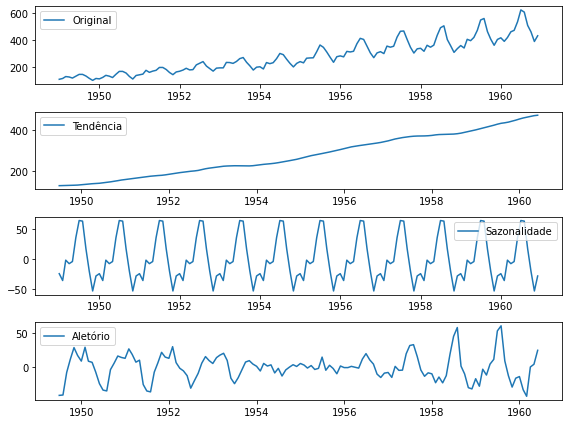

In [40]:
# Plotando graficos juntos para efeitos de comparação
plt.figure(figsize=(8, 6))
plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

# Visualização somente da tendência
plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

# Visualização somente da sazonalidade
plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

# Visualização somente do elemento aleatório
plt.subplot(4,1,4)
plt.plot(residuos, label = 'Aletório')
plt.legend(loc = 'best')
plt.tight_layout()



Aqui mais compacto temos uma visão geral e podemos comparar as informações antes e após a decomposição.